# Notebook_1_analisis_de_residuos

En este notebook vamos a trabajar con modelos de regresion , como las regresiones lineales simples, modelos de 'arbol o modelos de ensemble como el random forest

## Realizamos los import necesarios para nuestro trabajo

In [1]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns 
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Algunas configuraciones para llos plot del notebook

In [2]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

### Explicación de los problemas que vamos a ver

En este notebook se van a desarrollar tres ejercicios para observar y poner en practica lo que se ha observado durante la presentación de la sesión en la parte de residuos.

Los primeros dos ejercicios, se basan en observar el comportamiento de una regresion lineal en ciertos conjuntos de datos. en ellos se ajustará un modelo de reresión lineal y se llevaran a cabo una serie de comprobaciones que validen la correcta aplicación del modelo.

Los siguientes ejercicios trataran la observación y diagnostico de los residuos para distintos modelos.

# Ejercicio 1

### Leemos los datos

Los datos definen a ciertos individuos y sobre ellos se quiere calcular los metros cuadrados de la casa en la que viven.

In [3]:
datos_propietarios = pd.read_csv('https://raw.githubusercontent.com/jguijarh/The_Valley_outliers_and_residuals/main/data_residuals/data_metros.csv')
datos_propietarios.head()

,edad,hijos,salario,metros
0,31,3,32018.233405,166.568883
1,20,3,36165.572637,171.894914
2,27,3,26498.907000,149.913510
3,50,2,35464.755165,192.351205
4,40,0,43348.259222,199.868365


### Dividar datos en variables dependientes y variables independientes

In [4]:
X_propietarios = datos_propietarios[['edad', 'hijos', 'salario']]
Y_propietarios = datos_propietarios['metros']

### Definir el modelo

Definimos y ajustamos un modelo lineal con sklearn 

In [5]:
lin_reg_propietarios = LinearRegression()
lin_reg_propietarios.fit(X_propietarios, Y_propietarios)

print(f'Coefficients: {lin_reg_propietarios.coef_}')
print(f'Intercept: {lin_reg_propietarios.intercept_}')
print(f'R^2 score: {lin_reg_propietarios.score(X_propietarios, Y_propietarios)}')

Coefficients: [0.83324522 1.77481477 0.0029975 ]
Intercept: 40.28298744742756
R^2 score: 0.9855637383633058


### Linealidad de los modelos

In [6]:
def test_de_linealidad(model, X, y):
    '''
    Funcion para llevar a cabo la visualizacion de la linealidad
    '''
    y_predict = model.predict(X)
    residuos = y-y_predict

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=y_predict, 
                y=y, 
                lowess=True, 
                ax=ax[0], 
                line_kws={'color': 'red'})
    
    ax[0].set_title('Valor Observado vs. Valor Predicho', fontsize=16)
    ax[0].set(xlabel='Valor Predicho', ylabel='Valor Observado')

    sns.regplot(x=y_predict, 
                y=residuos, 
                lowess=True, 
                ax=ax[1],
                line_kws={'color': 'red'})
    
    ax[1].set_title('Residuos vs. Valor Predicho', fontsize=16)
    ax[1].set(xlabel='Valor Predicho', ylabel='Residuos')
    


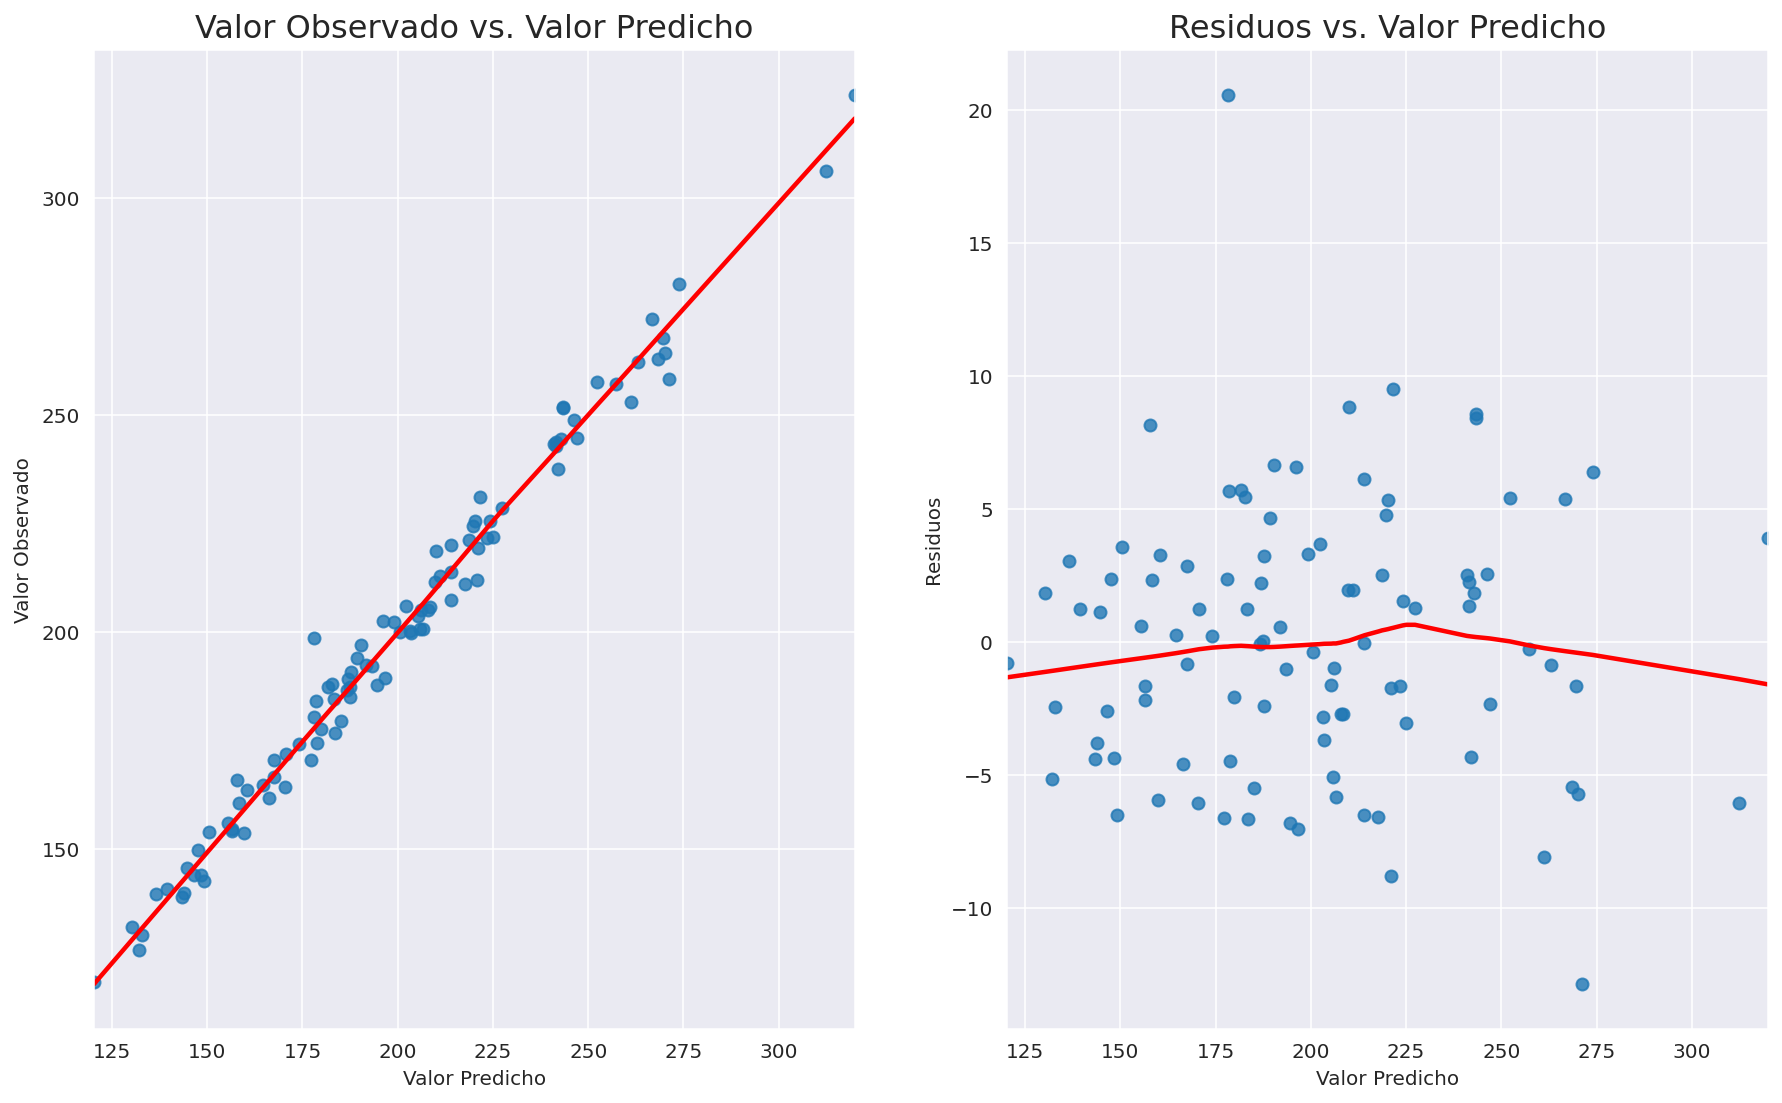

In [7]:
test_de_linealidad(lin_reg_propietarios, X_propietarios, Y_propietarios) 

### Media de los residuos

In [12]:
def calcular_media_residuos(model, X, y):
    '''
    Funcion para llevar a cabo el calcula de la media de residuos
    '''
    y_predict = model.predict(X)
    residuos = y-y_predict
    print(f"La media de los residuos es {residuos.mean()}")

In [13]:
calcular_media_residuos(lin_reg_propietarios, X_propietarios, Y_propietarios) 

La media de los residuos es 7.247535904753022e-15


### Distribución normal  de los residuos

In [14]:
def comprobar_normalidad(model, X, y):
    '''
    Funcion para llevar a cabo la visualizacion de la normalidad
    '''
    y_predict = model.predict(X)
    residuos = y-y_predict
    sns.distplot(residuos,kde=True)
    plt.title('Normalidad de los residuos')
    sm.ProbPlot(residuos).qqplot(line='s');
    plt.title('Q-Q plot');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


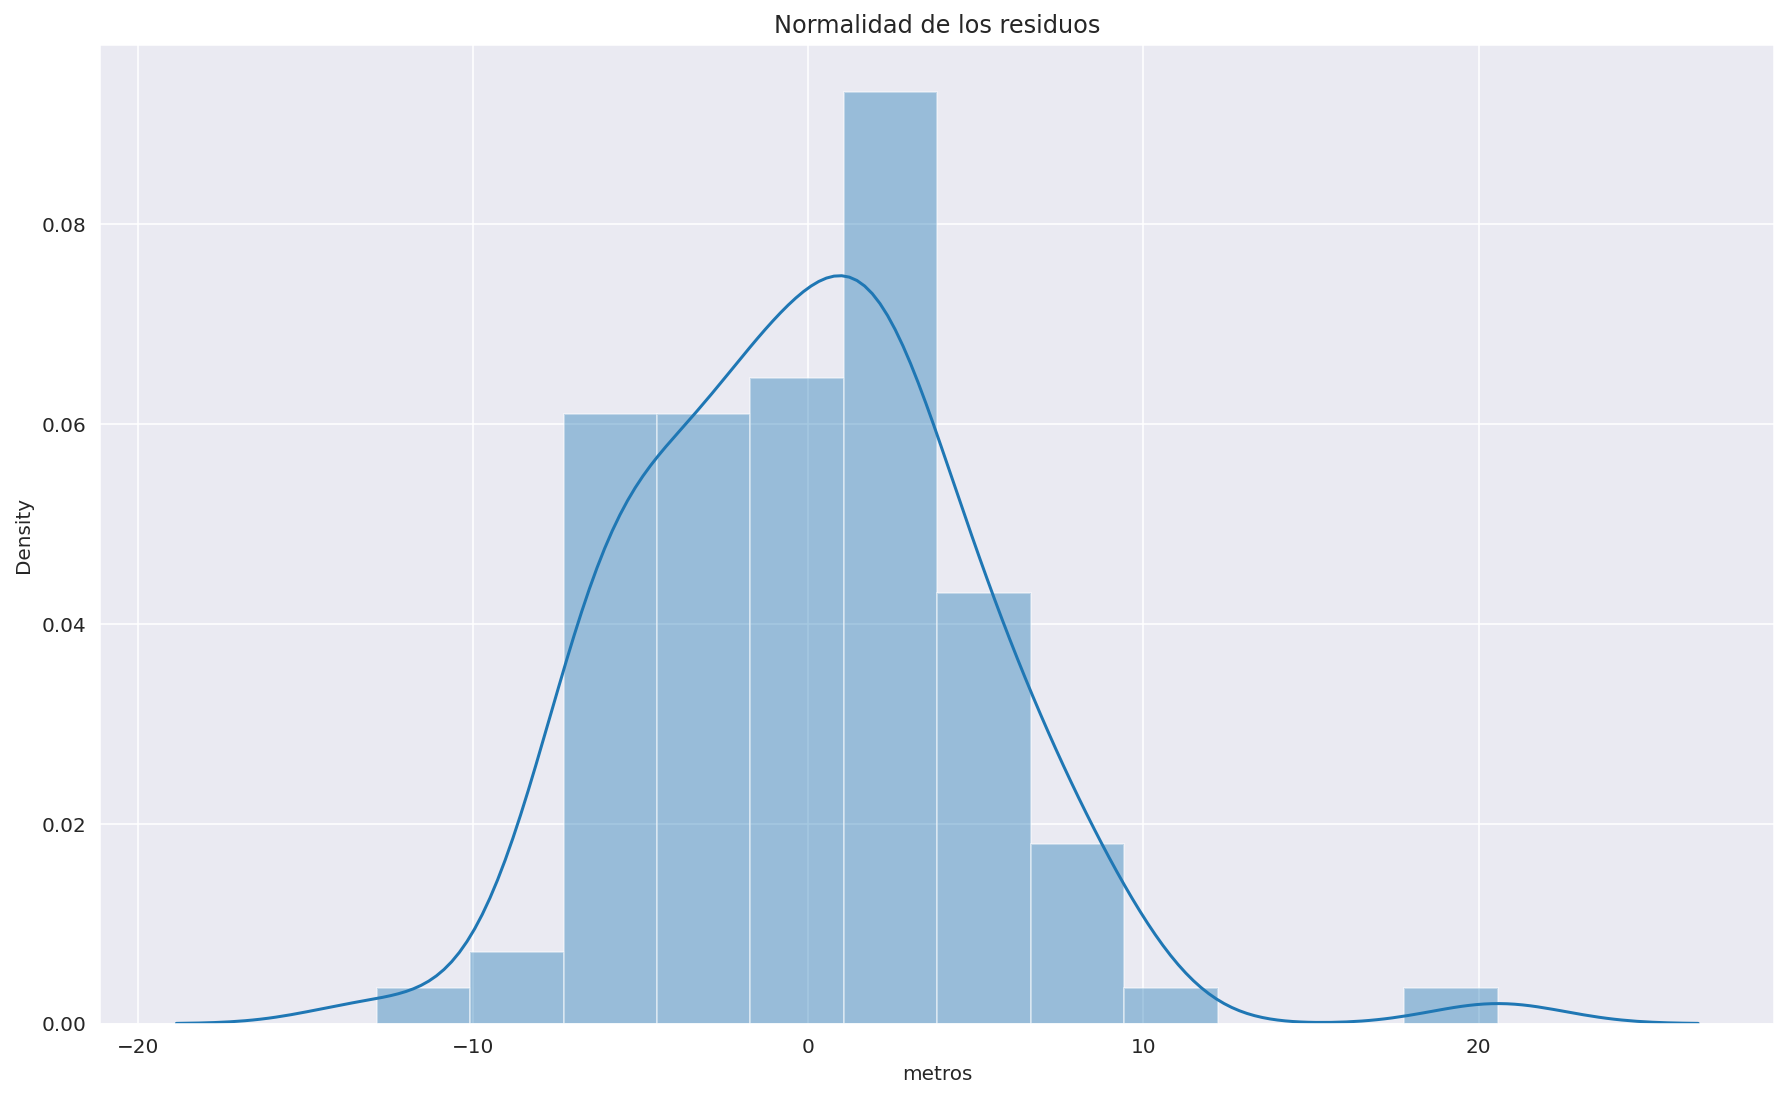

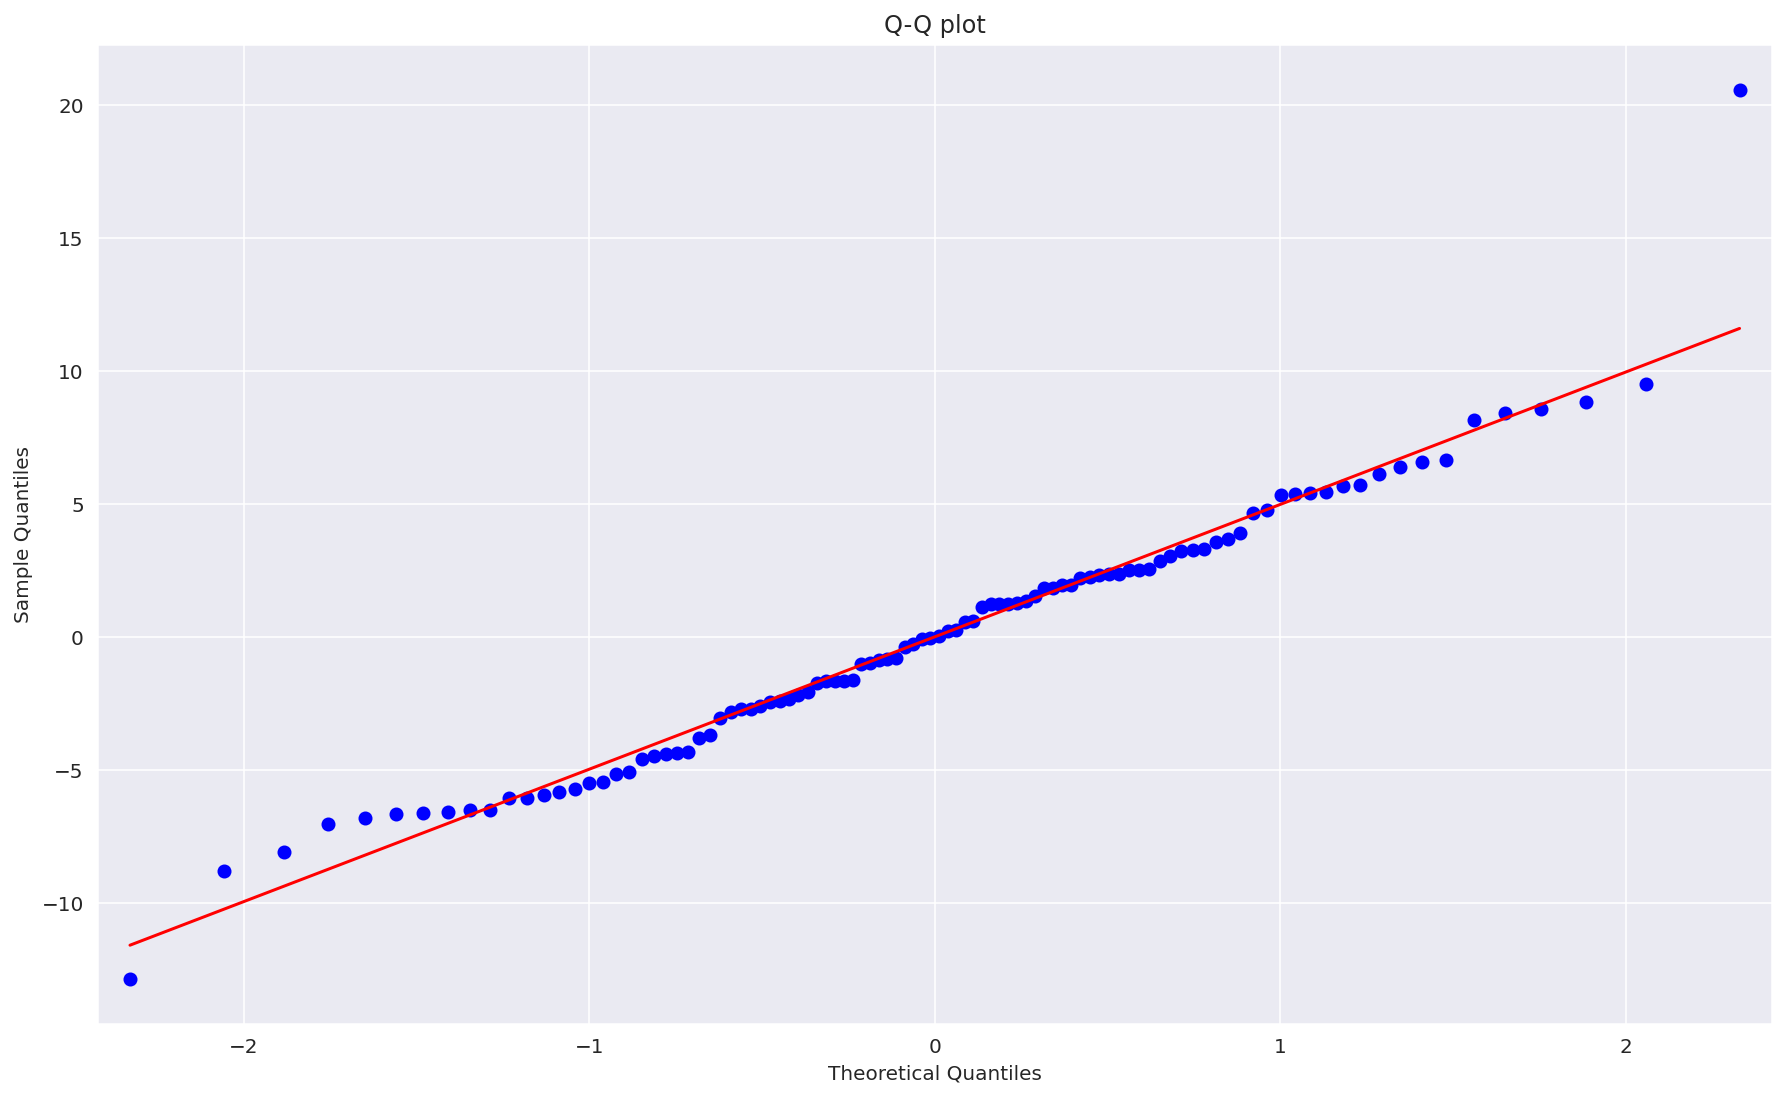

In [15]:
comprobar_normalidad(lin_reg_propietarios, X_propietarios, Y_propietarios) 

### Comprobar la homocedasticidad

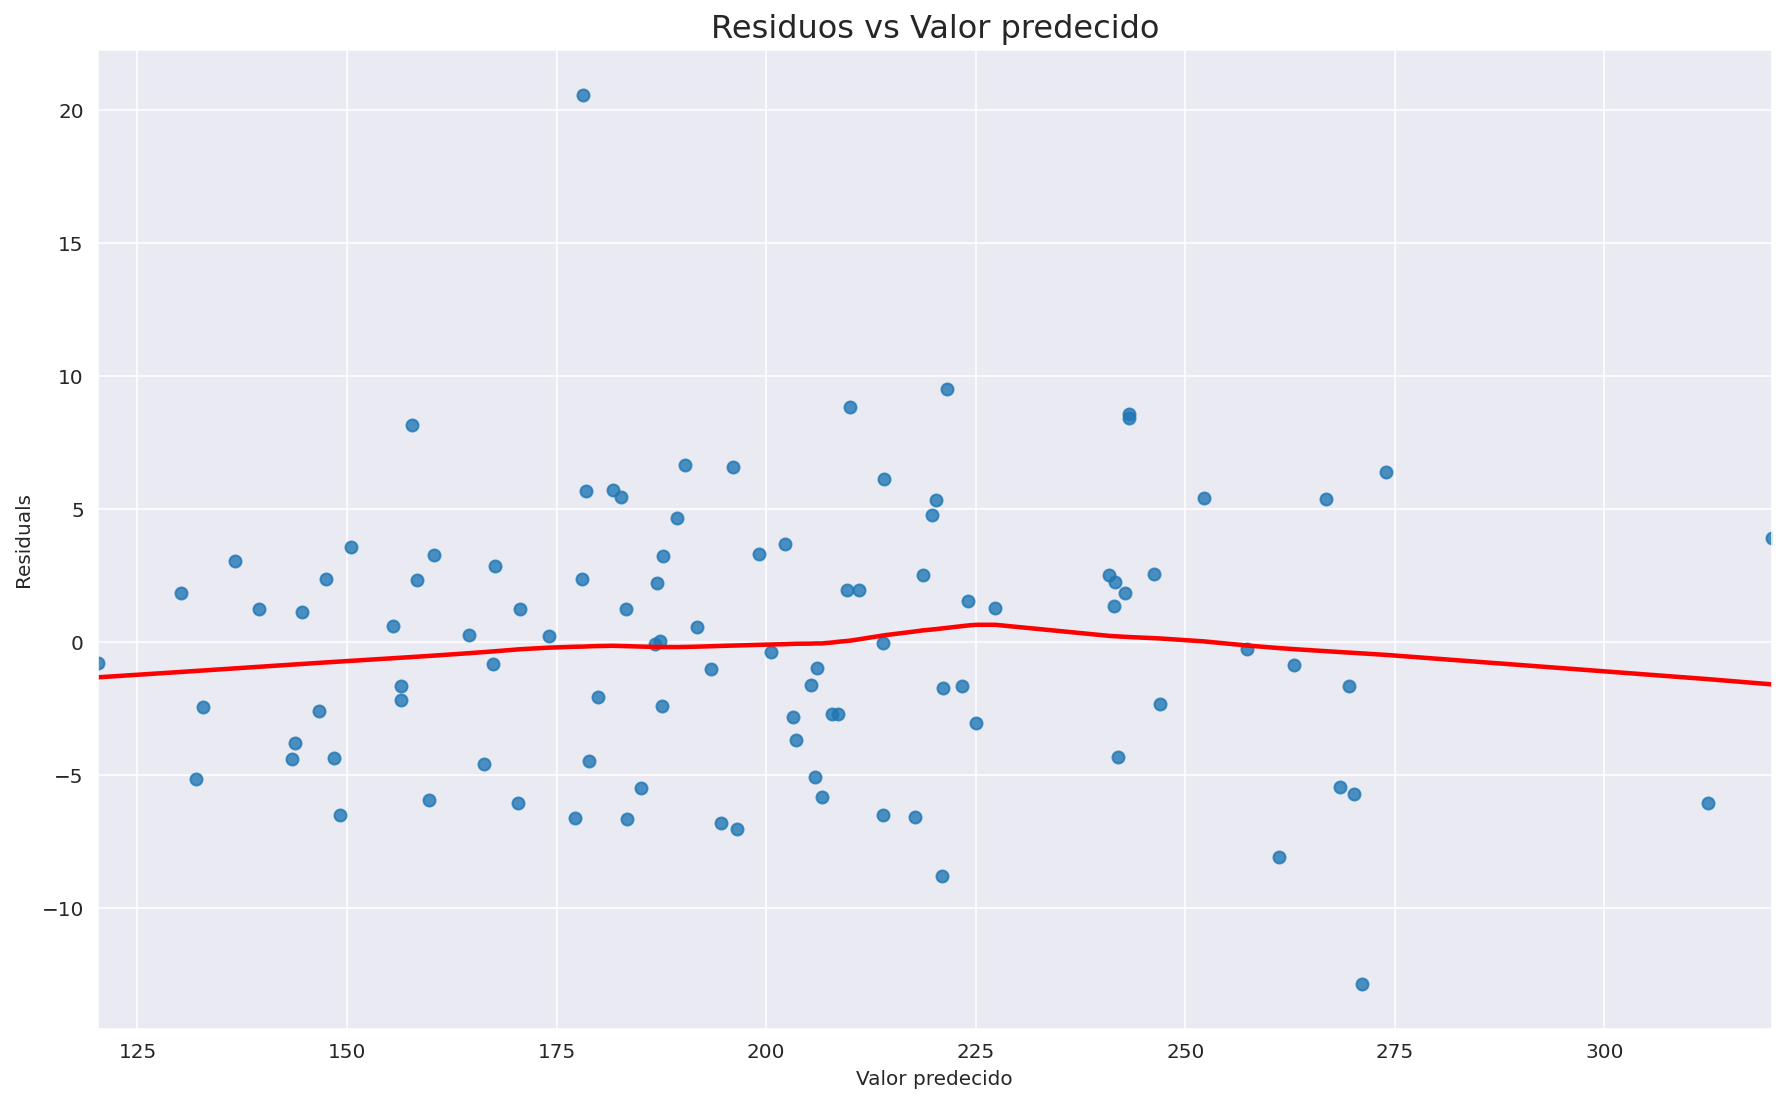

In [16]:
def test_de_homocedasticidad(model, X, y):
    '''
    Testeo visual de la homocedasticidad
    '''
    y_predict = model.predict(X)
    residuos = y-y_predict

#     fig, ax = plt.subplots(1,2)

    sns.regplot(x=y_predict, 
                y=residuos, 
                lowess=True, 
#                 ax=ax[0], 
                line_kws={'color': 'red'})
    plt.title('Residuos vs Valor predecido', fontsize=16)
    plt.xlabel('Valor predecido')
    plt.ylabel('Residuals')

    

test_de_homocedasticidad(lin_reg_propietarios, X_propietarios, Y_propietarios) 

### Comprobar la no autocorrelacion de los residuos

Para testear la autocorrelacion de los residuos emplearemos smt.graphics.plot_acf() que nos permite observar de forma visual estas correlaciones

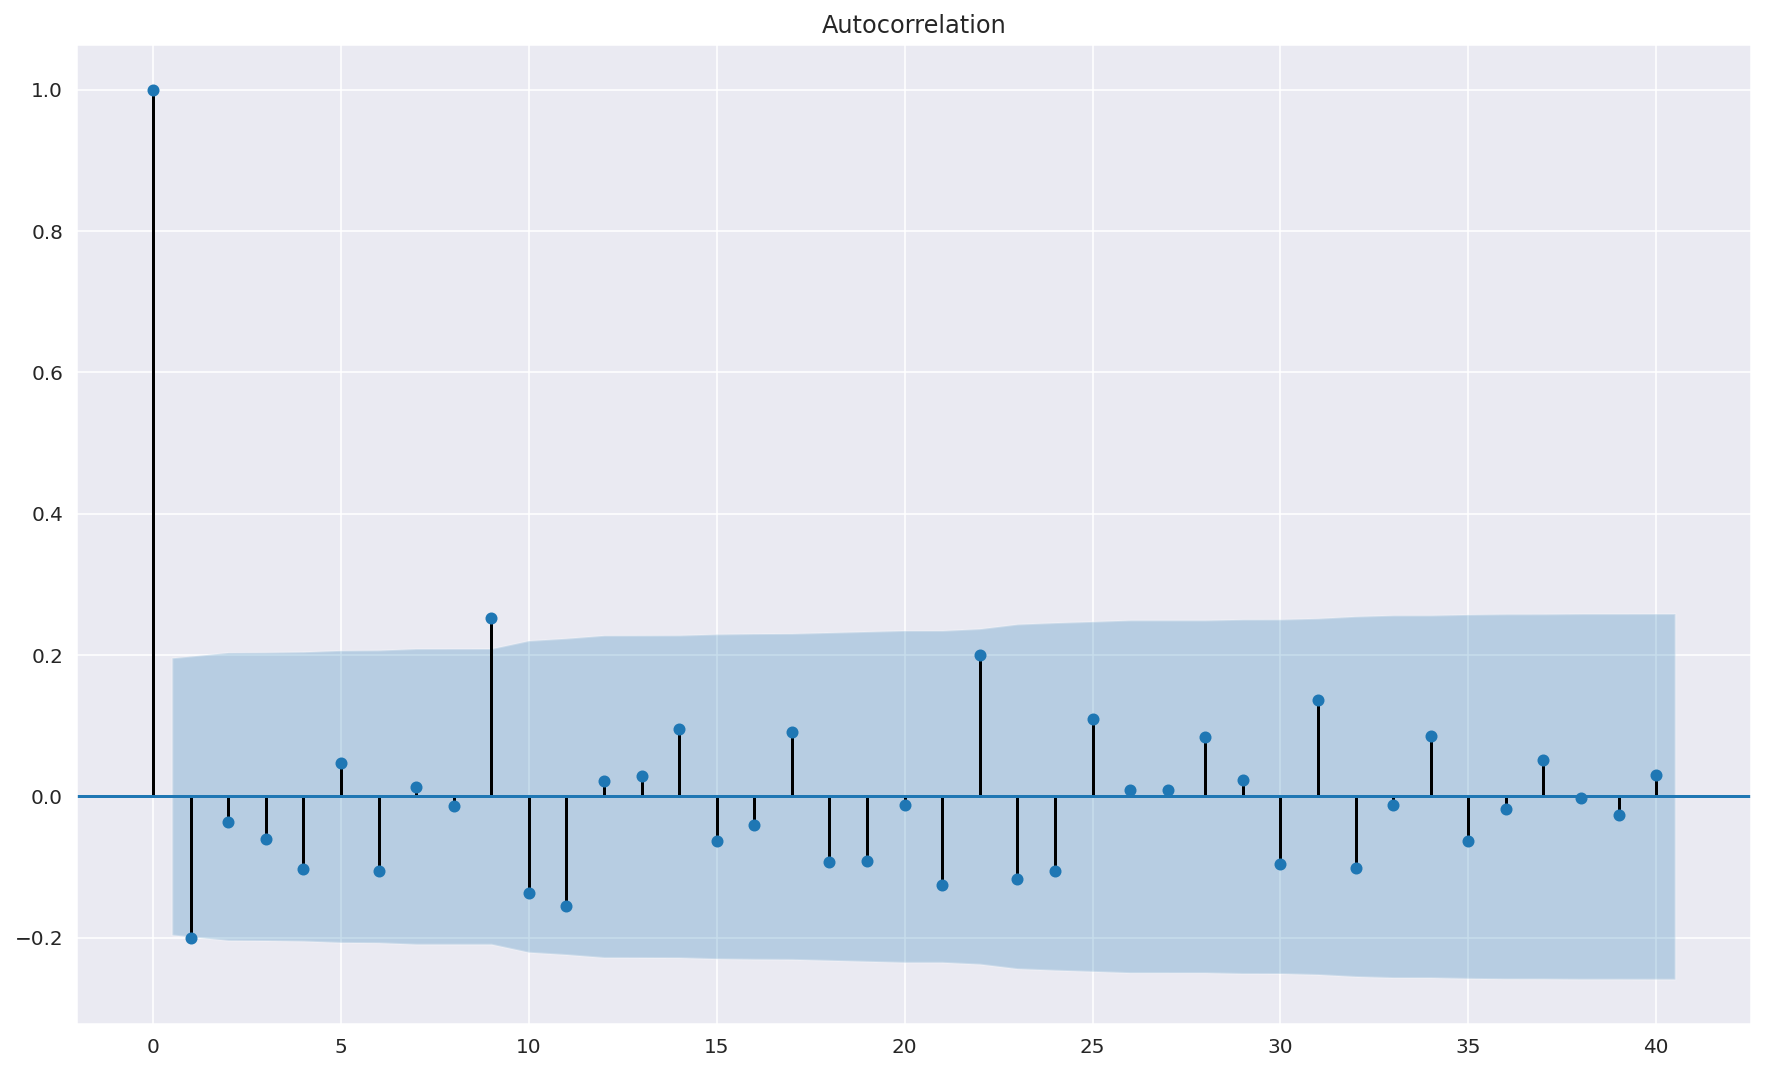

In [17]:
def test_autocorrelacion(model,X,y):
    '''
    Testeo visual de la autocorrelacion
    '''
    y_predict = model.predict(X)
    residuos = y-y_predict
    acf = smt.graphics.plot_acf(residuos, lags=40 , alpha=0.05)
    acf.show()
    
test_autocorrelacion(lin_reg_propietarios, X_propietarios, Y_propietarios) 

# Ejercicio 2

Vamos a realizar lo mismo que en el ejercicio 1 pero esta vez con los datos de los precios de las viviendas en boston, dataset muy utilizado en el mundo del dato

### Lectura de los datos para el ejercicio

In [18]:
from sklearn.datasets import load_boston
boston = load_boston()

X_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
X_boston.drop('CHAS', axis=1, inplace=True)
Y_boston = pd.Series(boston.target, name='MEDV')

# inspect data
X_boston.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Definición del modelo a emplear

In [19]:
lin_reg_boston = LinearRegression()
lin_reg_boston.fit(X_boston, Y_boston)

print(f'Coeficientes de la regresion: {lin_reg_boston.coef_}')
print(f'Intercepto: {lin_reg_boston.intercept_}')
print(f'R^2 score: {lin_reg_boston.score(X_boston, Y_boston)}')

Coeficientes de la regresion: [-1.13139078e-01  4.70524578e-02  4.03114536e-02 -1.73669994e+01
  3.85049169e+00  2.78375651e-03 -1.48537390e+00  3.28311011e-01
 -1.37558288e-02 -9.90958031e-01  9.74145094e-03 -5.34157620e-01]
Intercepto: 36.891959796932426
R^2 score: 0.7355165089722999


### Linealidad de los modelos

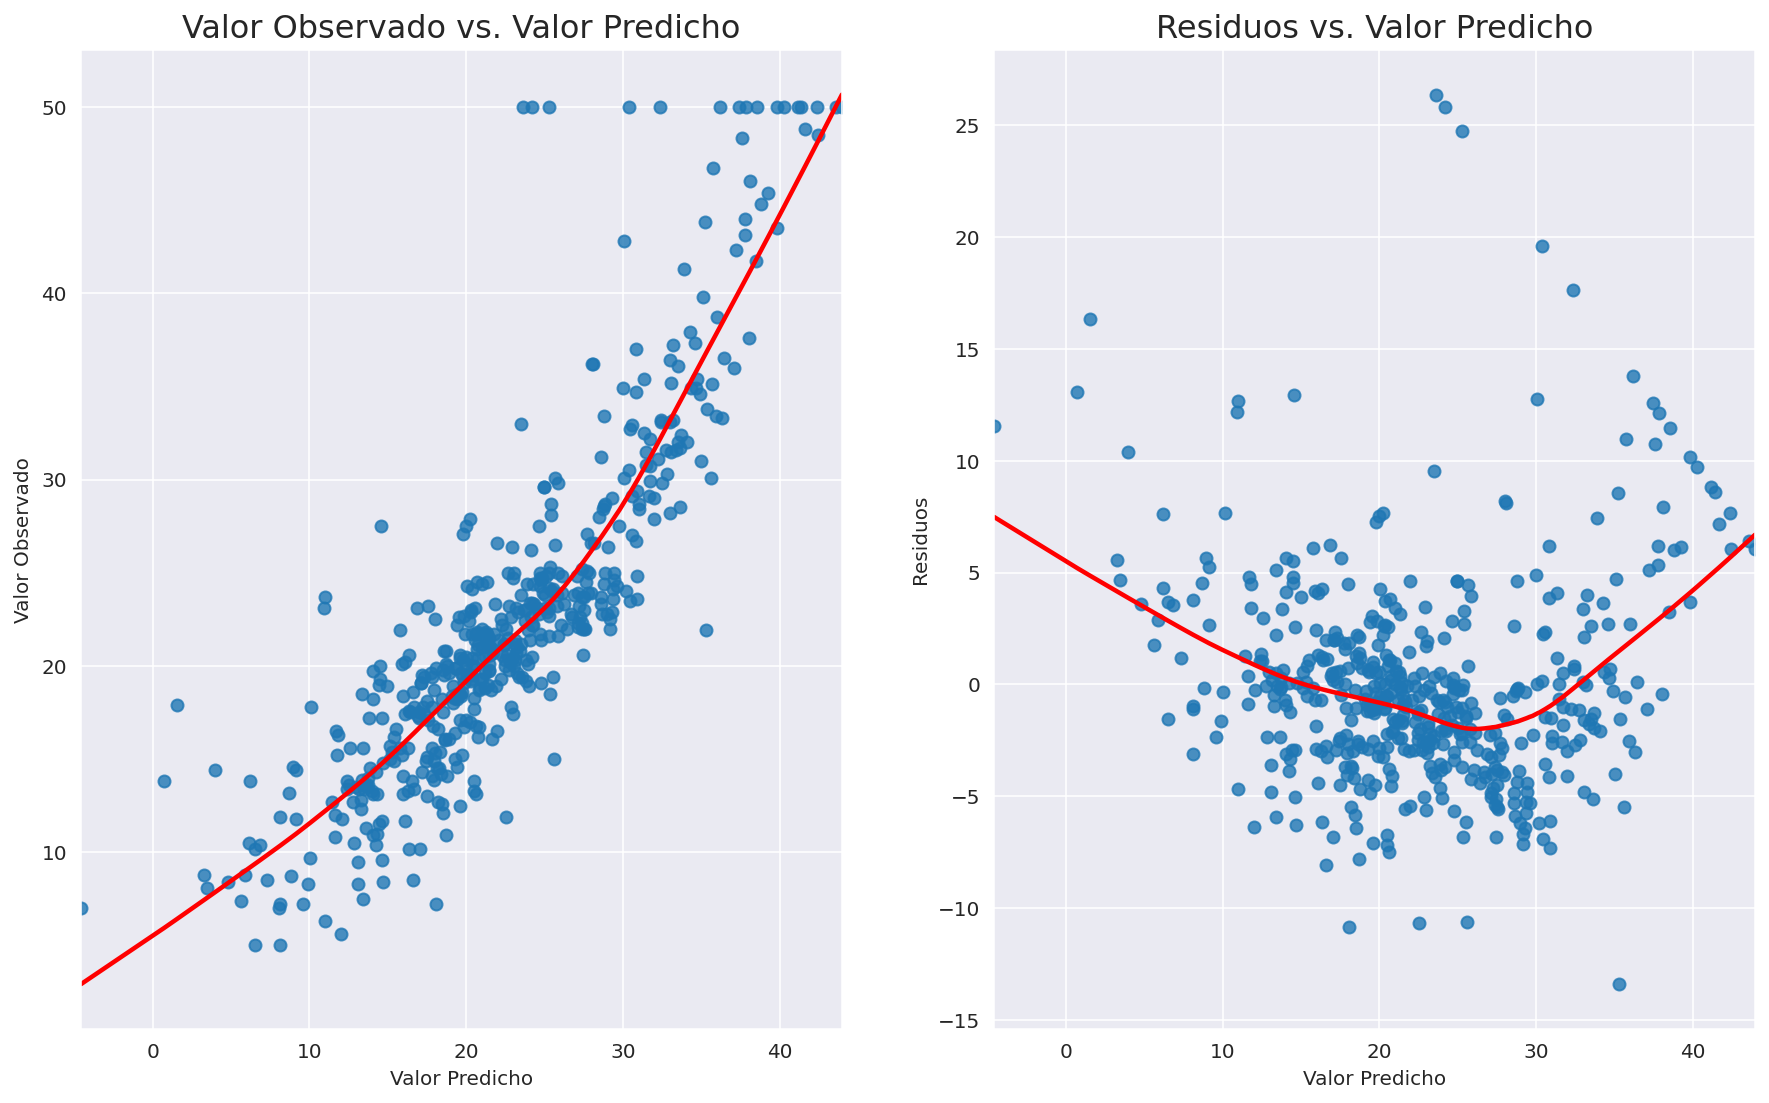

In [20]:
test_de_linealidad(lin_reg_boston, X_boston, Y_boston) 

### Media de los residuos

In [21]:
calcular_media_residuos(lin_reg_boston, X_boston, Y_boston)

La media de los residuos es 5.936402006770402e-15


### Distribución normal  de los residuos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


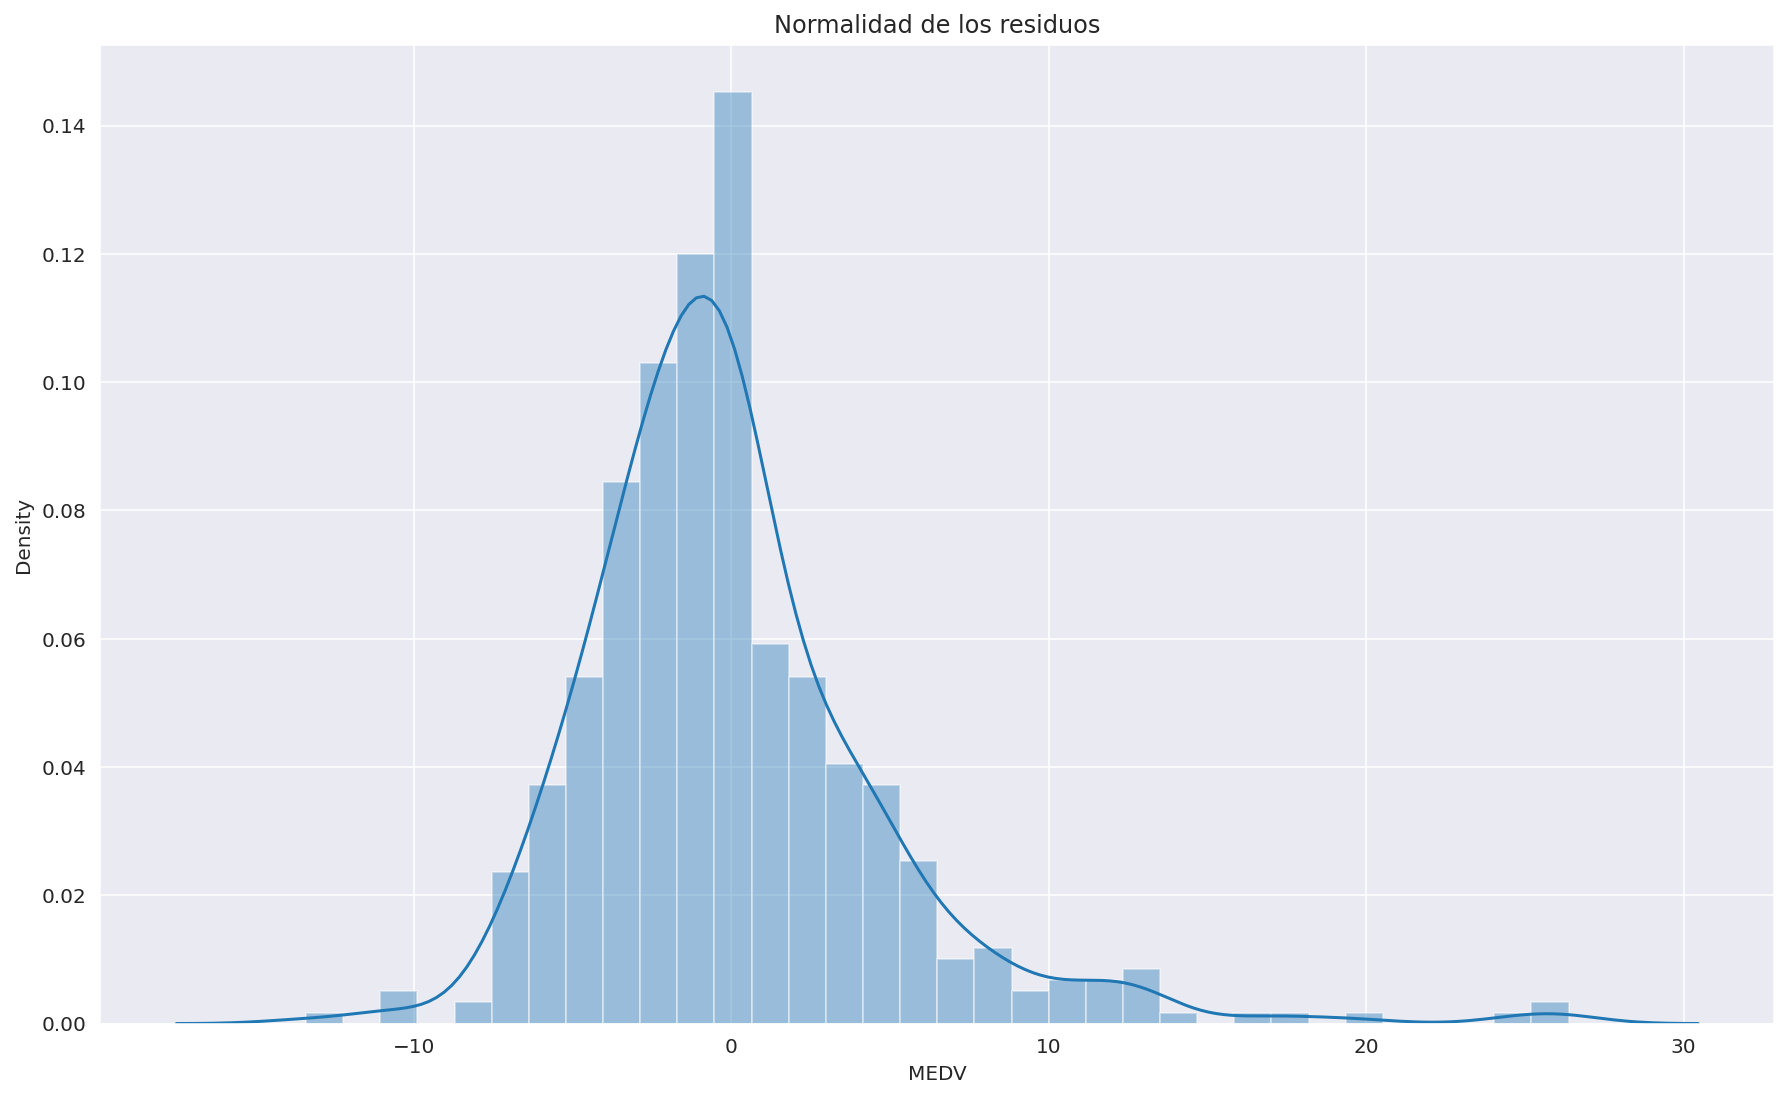

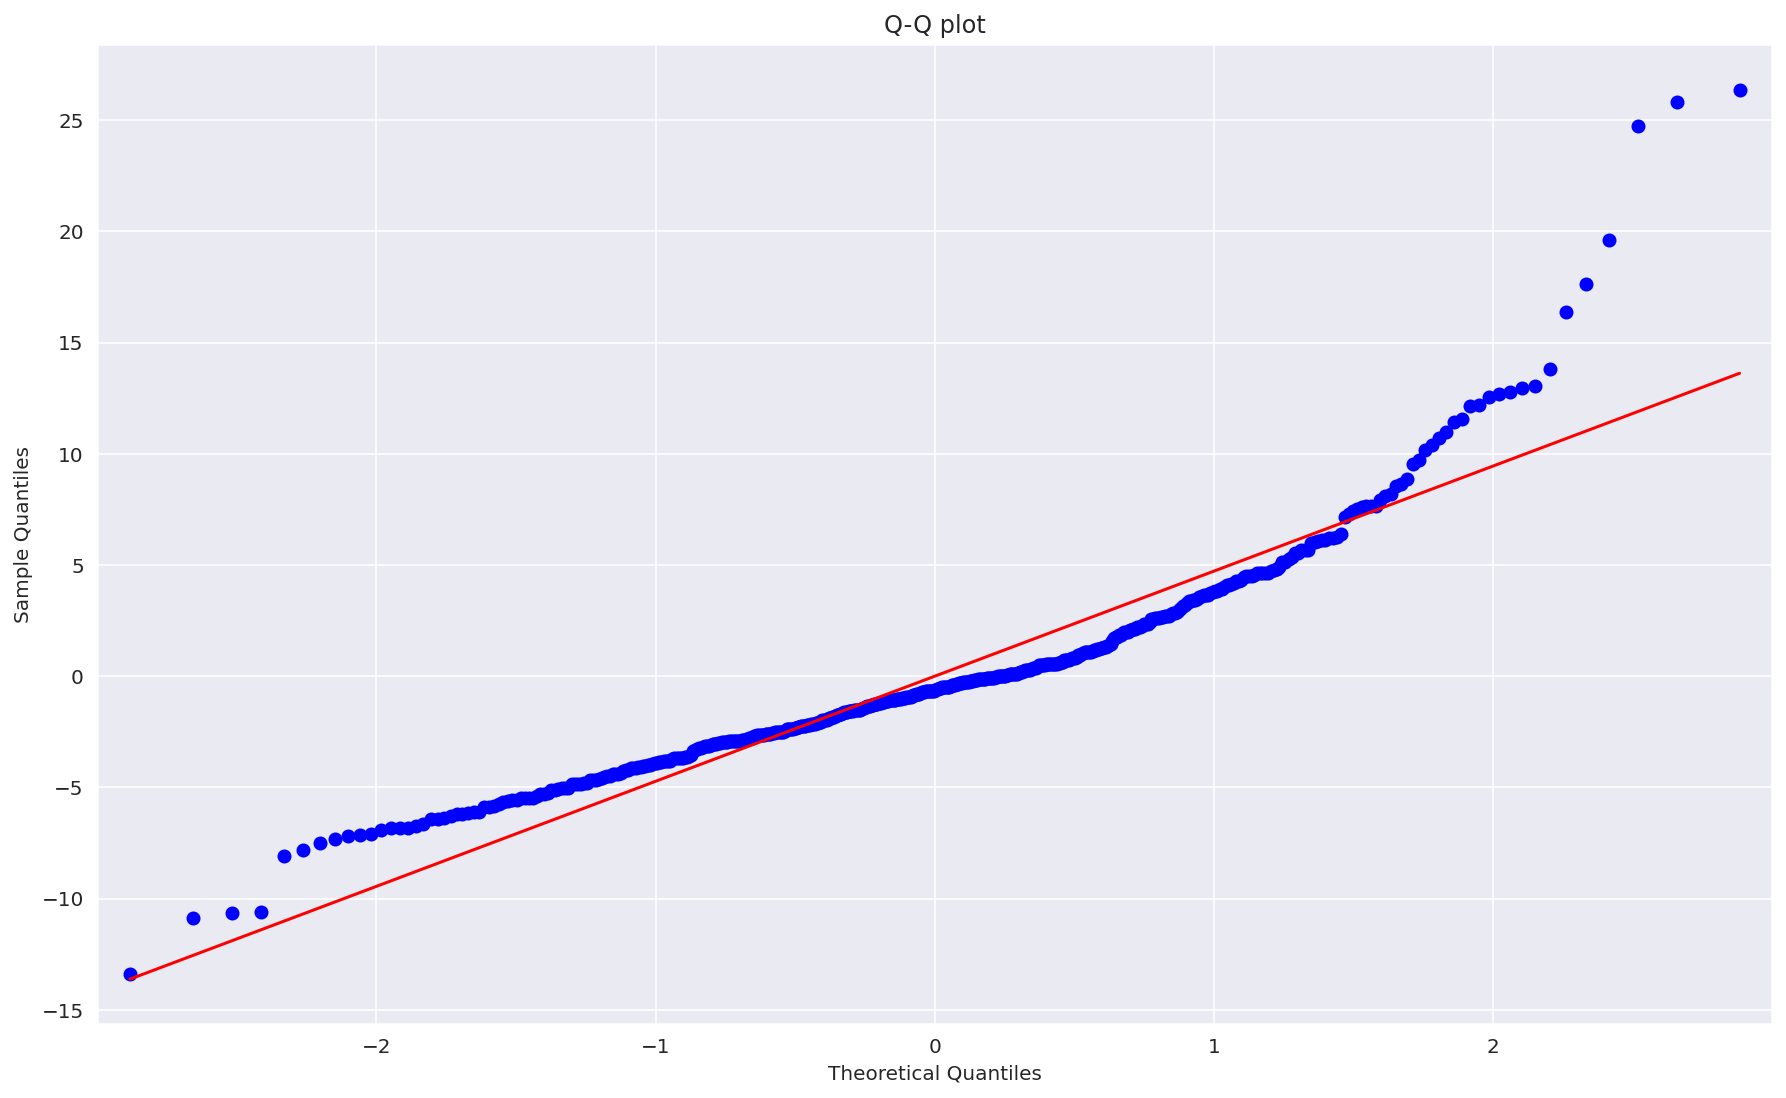

In [22]:
comprobar_normalidad(lin_reg_boston, X_boston, Y_boston) 

### Comprobar la homocedasticidad

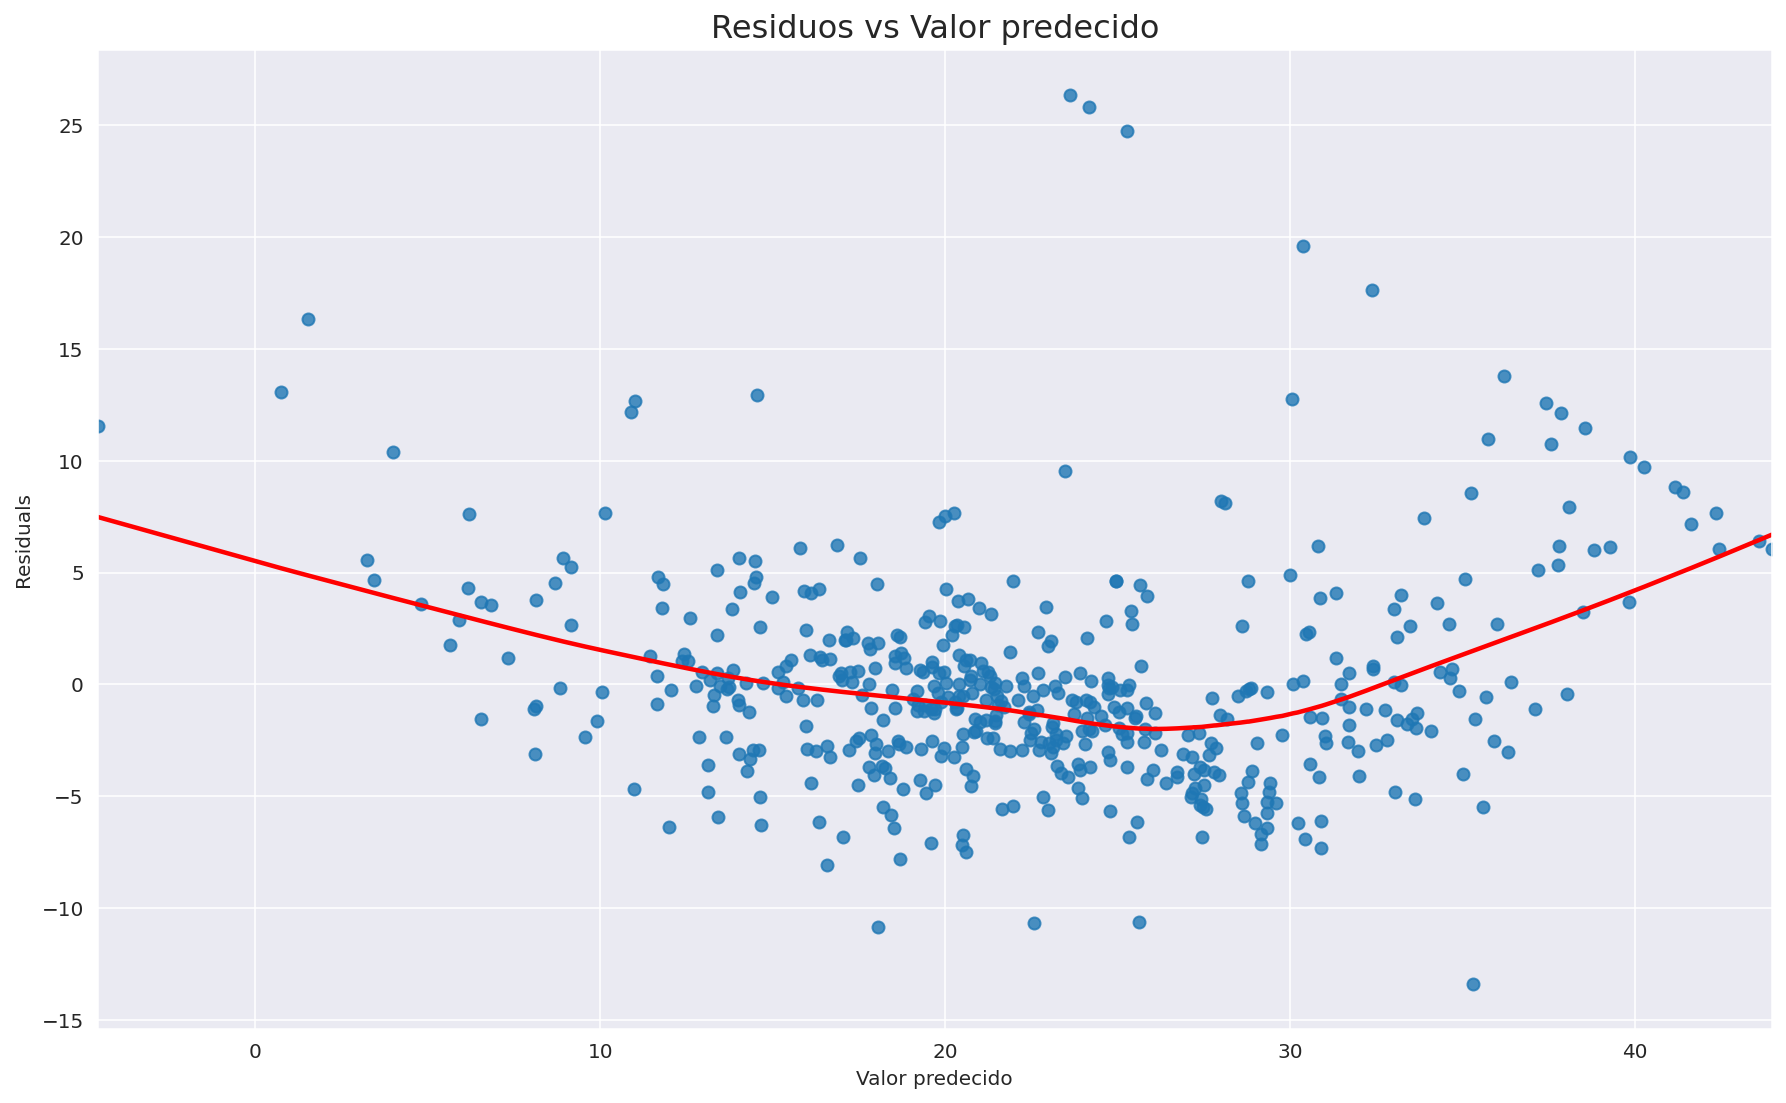

In [23]:
test_de_homocedasticidad(lin_reg_boston, X_boston, Y_boston) 

### Comprobar la no autocorrelacion de los residuos

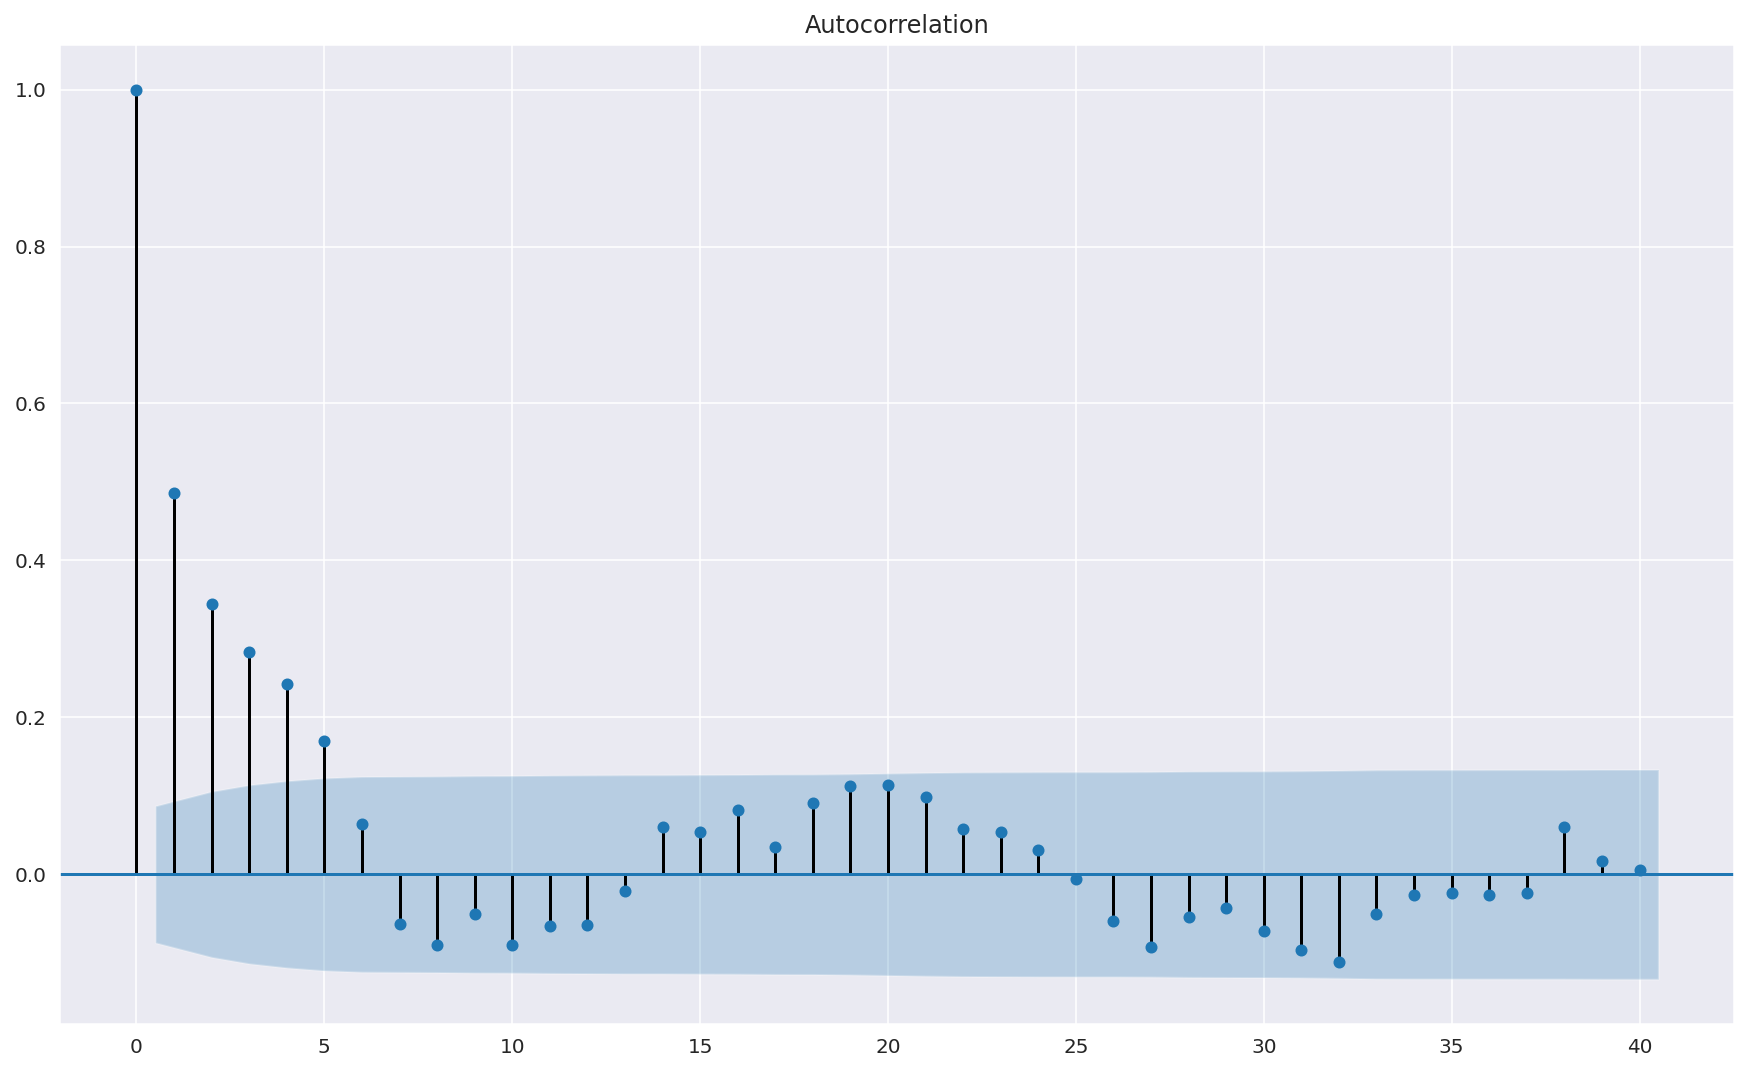

In [24]:
test_autocorrelacion(lin_reg_boston, X_boston, Y_boston)

Analizamos las gráficas

# Ejercicio 3

Ahora vamos a probar a implementar un modelo de arbol en el dato de las propiedades de boston y observar como se comporta su diagrama de residuos.

### Dividimos los datos 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_boston,
                                                    Y_boston ,
                                                    test_size = 0.3, 
                                                    random_state = 25)

tree_model_5 = tree.DecisionTreeRegressor(max_depth=5).fit(X = X_train, y = y_train)
y_train_pred_5 = tree_model_5.predict(X_train)

tree_model_8 = tree.DecisionTreeRegressor(max_depth=8).fit(X = X_train, y = y_train)
y_train_pred_8 = tree_model_8.predict(X_train)

tree_model_15 = tree.DecisionTreeRegressor(max_depth=15).fit(X = X_train, y = y_train)
y_train_pred_15 = tree_model_15.predict(X_train)

## Visualización de los residuos para un arbol de decisión

In [27]:
def plot_tree_residuals(model,X, y):
    '''
    Función para visualizar el residual plot de los modelos de arbol. 
    Es identica a la del testeo de la linealidad
    '''
    fitted_vals = model.predict(X)
    resids = y-fitted_vals

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, 
                y=y, 
                lowess=True, 
                ax=ax[0], 
                line_kws={'color': 'red'})
    
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, 
                y=resids, 
                lowess=True, 
                ax=ax[1],
                line_kws={'color': 'red'})
    
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

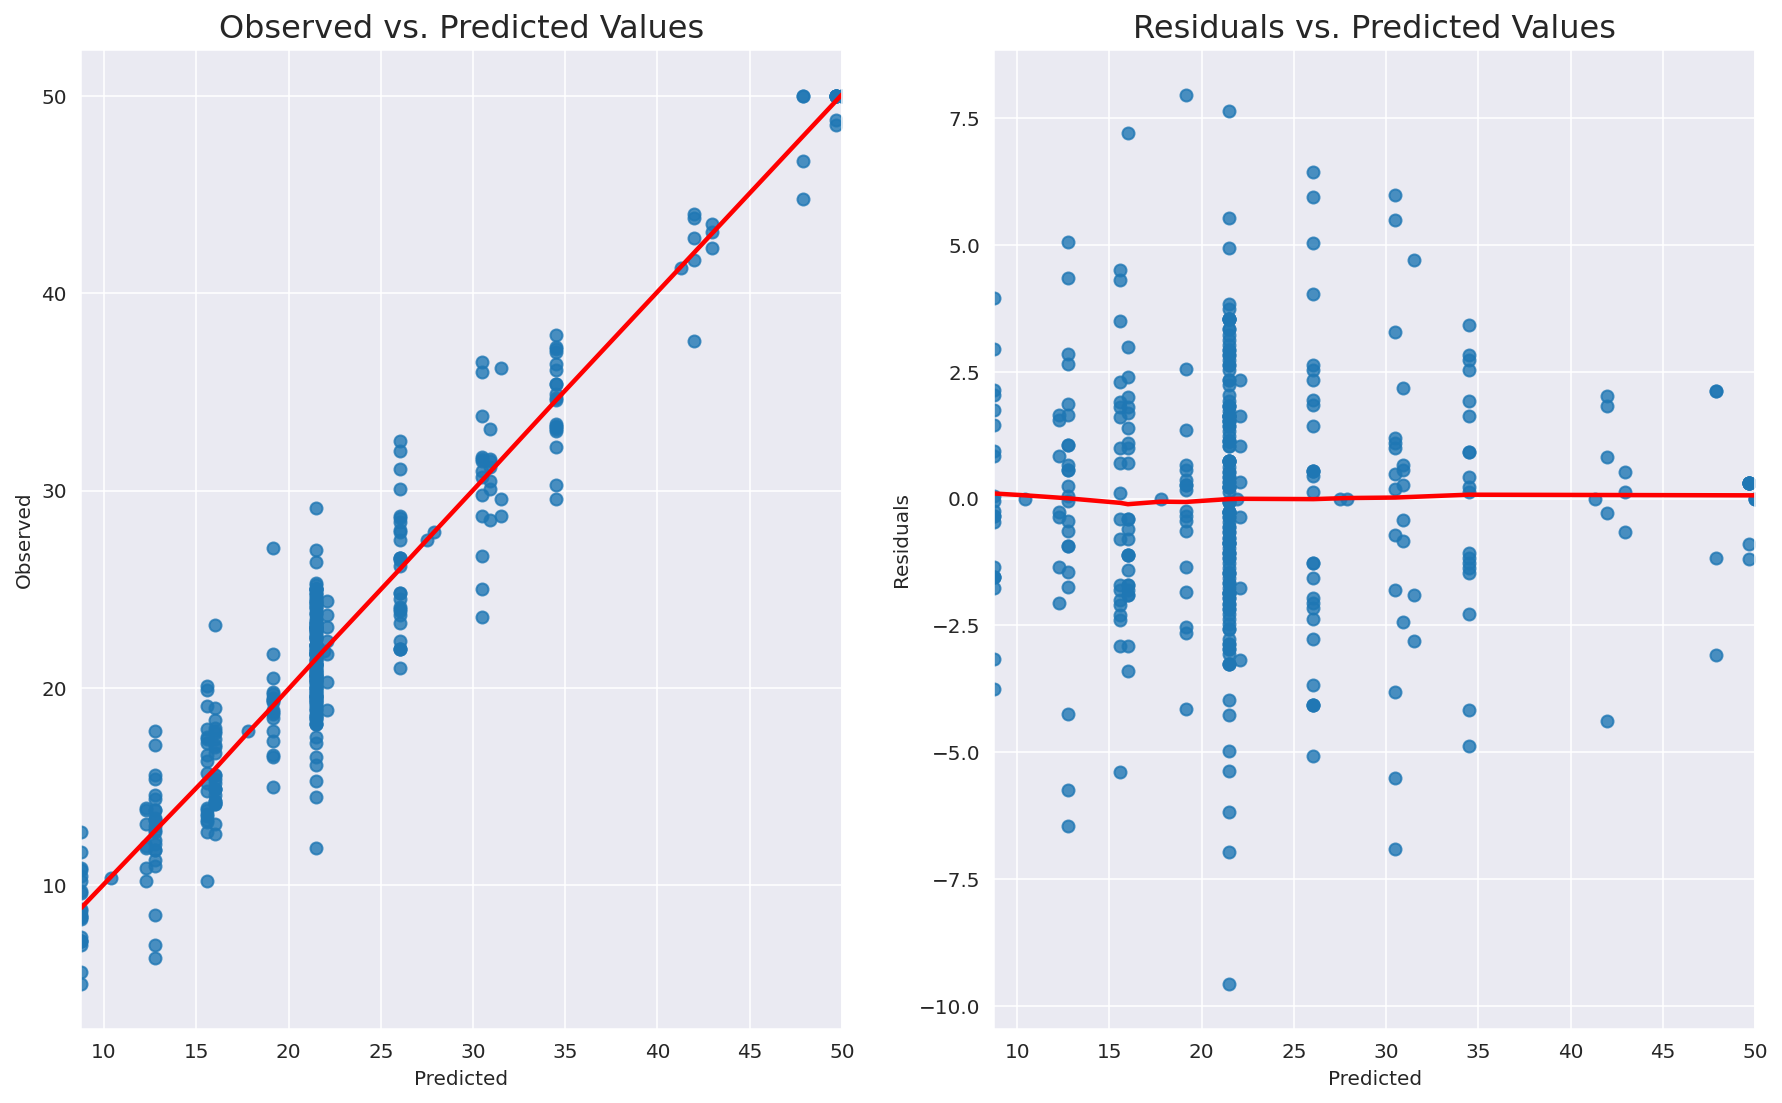

In [28]:
plot_tree_residuals(tree_model_5, X_train, y_train)

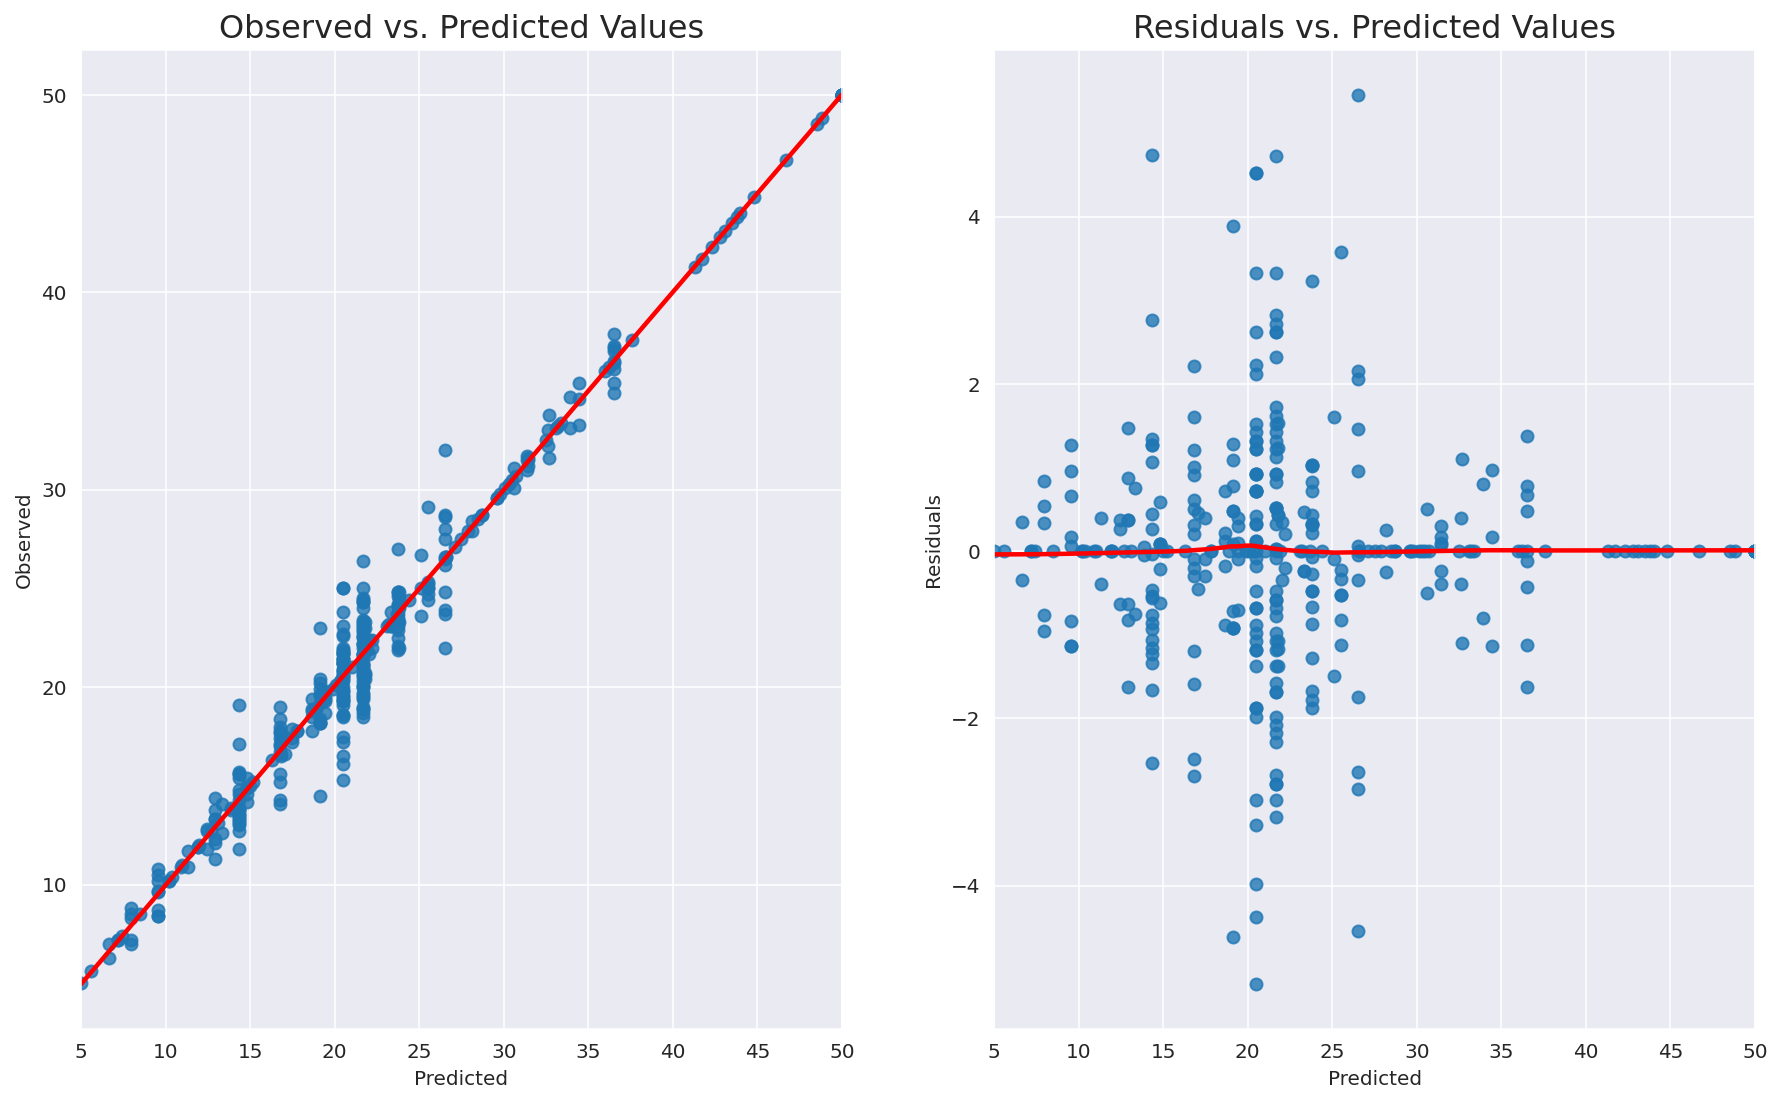

In [29]:
plot_tree_residuals(tree_model_8, X_train, y_train)

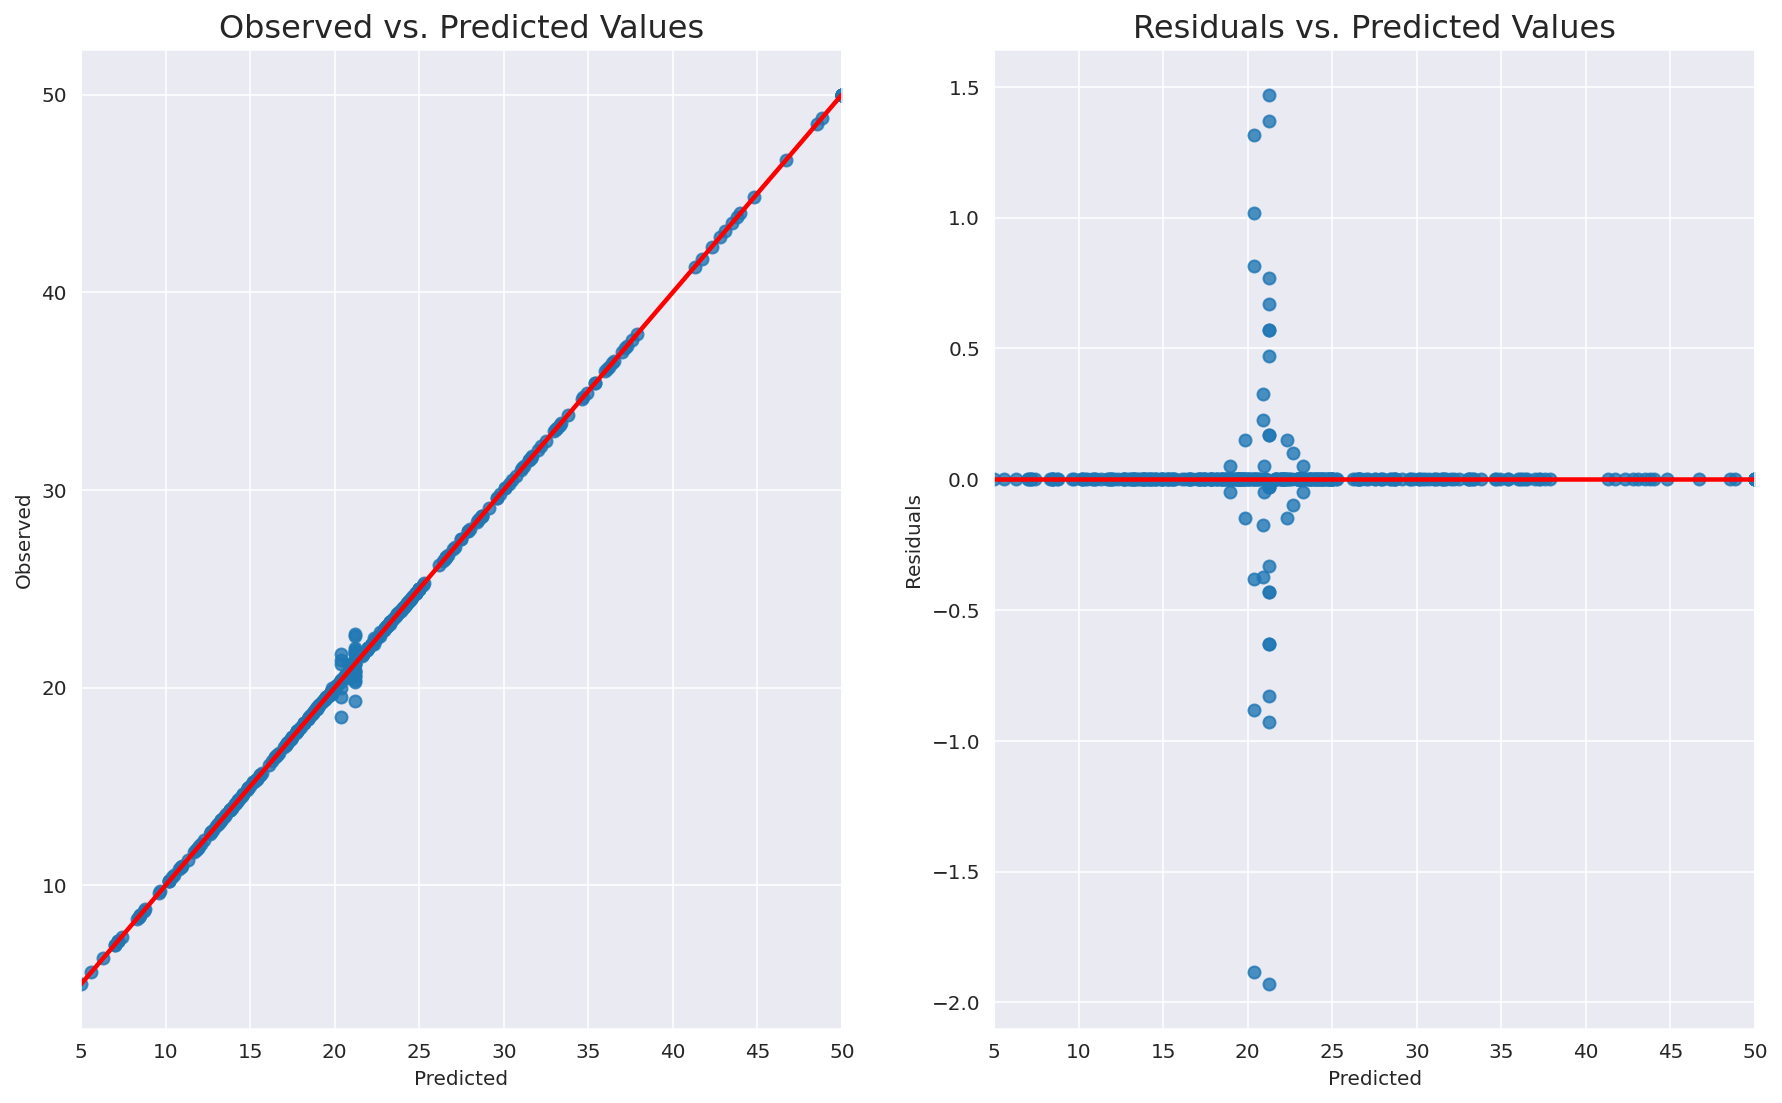

In [30]:
plot_tree_residuals(tree_model_15, X_train, y_train)